In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
target_variable = df['Drug']
target_variable = pd.DataFrame(target_variable)
input_variables = df.drop('Drug', axis = 'columns')

In [5]:
input_variables

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [6]:
# ML algorithhm only works on numbers , so we need to convert input_variables to labels (Label Encoder)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df_Sex = LabelEncoder()
df_BP = LabelEncoder()
df_Cholesterol = LabelEncoder()

In [10]:
input_variables

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [25]:
# Inverse Transform: If you want to convert these numerical labels back to the original categorical values, you can use the inverse_transform method.
input_variables_Sex = df_Sex.inverse_transform(input_variables['Sex'])
input_variables_BP = df_BP.inverse_transform(input_variables['BP'])
input_variables_Cl = df_Cholesterol.inverse_transform(input_variables['Cholesterol'])
input_variables_Sex

array(['F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F',
       'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
       'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F

In [12]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [13]:
df_drug = LabelEncoder()
target_variable['Drug'] = df_drug.fit_transform(target_variable['Drug'])

In [14]:
target_variable

,Drug
0,4
1,2
2,2
3,3
4,4
...,...
195,2
196,2
197,3
198,3


In [15]:
from sklearn import tree

In [16]:
model = tree.DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_variables , target_variable, test_size = 0.2)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
model.score(input_variables, target_variable)*100

99.5

In [20]:
model.predict([[23,0,0,0,25.355]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])

In [21]:
model.predict([[55,1,0,0,10.977]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.625, 0.9, 'x[4] <= 14.627\ngini = 0.702\nsamples = 160\nvalue = [19, 13, 15, 41, 72]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.685\nsamples = 88\nvalue = [19, 13, 15, 41, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.482\nsamples = 32\nvalue = [19, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.392\nsamples = 56\nvalue = [0, 0, 15, 41, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 30\nvalue = [0, 0, 15, 15, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]')]

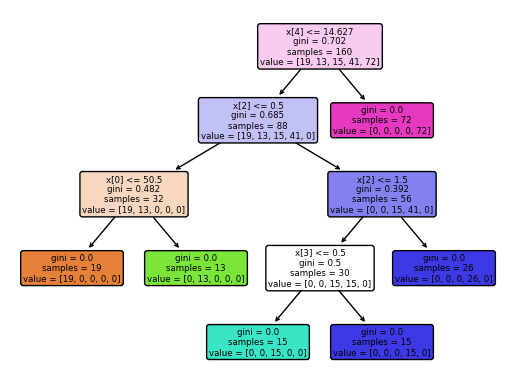

In [22]:
tree.plot_tree(model, filled=True, rounded=True)